In [1]:
import pandas as pd
import datetime
import pyarrow

In [49]:
pd.set_option('display.max_columns',10)

In [30]:
df_df = pd.read_csv('train.csv')
df_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_df.loc[0:2 ,'Pclass':'Name']

Pclass                                               Name
0       3                            Braund, Mr. Owen Harris
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2       3                             Heikkinen, Miss. Laina

In [68]:
df_df['Sex'].unique()

array(['male', 'female'], dtype=object)

How many people are travel in train by the Gender

In [69]:
df_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [67]:
df_df.size

10692

In [20]:
data = pd.read_csv('train.csv')

In [2]:
data_excel=pd.read_excel('olympics-data.xlsx')
data_excel.head()

athlete_id                   name   born_date    born_city  \
0           1  Jean-François Blanchy  1886-12-12     Bordeaux   
1           2         Arnaud Boetsch  1969-04-01       Meulan   
2           3           Jean Borotra  1898-08-13     Biarritz   
3           4        Jacques Brugnon  1895-05-11  Paris VIIIe   
4           5           Albert Canet  1878-04-17   Wandsworth   

            born_region born_country     NOC  height_cm  weight_kg   died_date  
0               Gironde          FRA  France        NaN        NaN  1960-10-02  
1              Yvelines          FRA  France      183.0       76.0         NaN  
2  Pyrénées-Atlantiques          FRA  France      183.0       76.0  1994-07-17  
3                 Paris          FRA  France      168.0       64.0  1978-03-20  
4               England          GBR  France        NaN        NaN  1930-07-25

In [23]:
data_excel.loc[data_excel['height_cm']>200, ['name','height_cm']].head()

name  height_cm
1080      Bozhil Lozanov      208.0
1673    Alexis Rubalcaba      204.0
2647       Milan Šrejber      203.0
2827  Nik'oloz Deriugini      206.0
2832       Elşad Qadaşev      205.0

In [47]:
data_excel[(data_excel['height_cm']>200) & (data_excel['born_country']=='USA')].head()

athlete_id          name   born_date     born_city     born_region  \
5197        5216  Anne Donovan  1961-11-01     Ridgewood      New Jersey   
5652        5675   Mike Bantom  1951-12-03  Philadelphia    Pennsylvania   
5657        5680    Jim Barnes  1941-04-13     Tuckerman        Arkansas   
5681        5704  Walt Bellamy  1937-07-24      New Bern  North Carolina   
5709        5732    Larry Bird  1956-12-07   French Lick         Indiana   

     born_country            NOC  height_cm  weight_kg   died_date  
5197          USA  United States      203.0       62.0  2018-06-13  
5652          USA  United States      203.0       93.0         NaN  
5657          USA  United States      201.0      109.0  2002-09-14  
5681          USA  United States      211.0       98.0  2013-11-02  
5709          USA  United States      205.0      100.0         NaN

In [369]:
data_excel[(data_excel['born_region']=='New Hampshire') | (data_excel['born_city']=='San Francisco')]

athlete_id                 name  born_date      born_city  \
6128          6155  Raúl García-Ordóñez 1924-09-15      Littleton   
7290          7329            Jim Walsh 1930-08-29  San Francisco   
8619          8666      George Finnegan 1881-09-28  San Francisco   
8639          8686         Frank Haller 1883-01-06  San Francisco   
10981        11038       DeAnne Hemmens 1964-07-02  San Francisco   
...            ...                  ...        ...            ...   
143731      147386       Joe Speer Ryan 1996-06-05  San Francisco   
144449      148141      Elese Sommerová 2001-09-15          Dover   
145342      149065         Nina O'Brien 1997-11-29  San Francisco   
145381      149104      Colby Stevenson 1997-10-03     Portsmouth   
145394      149117      Caroline Harvey 2002-10-14         Pelham   

          born_region born_country            NOC  height_cm  weight_kg  \
6128    New Hampshire          USA           Cuba      188.0        NaN   
7290       California          USA  United States      193.0       86.0   
8619       California          USA  United States        NaN        NaN   
8639       California          USA  United States        NaN        NaN   
10981      California          USA  United States        NaN        NaN   
...               ...          ...            ...        ...        ...   
143731     California          USA  United States      188.0        NaN   
144449  New Hampshire          USA        Czechia        NaN        NaN   
145342     California          USA  United States        NaN        NaN   
145381  New Hampshire          USA  United States        NaN        NaN   
145394  New Hampshire          USA  United States        NaN        NaN   

         died_date     Category  
6128    2013-05-03  Heavyweight  
7290    1976-03-04  Heavyweight  
8619    1913-02-28  Heavyweight  
8639    1939-04-30  Heavyweight  
10981          NaN  Heavyweight  
...            ...          ...  
143731         NaN  Heavyweight  
144449         NaN  Heavyweight  
145342         NaN  Heavyweight  
145381         NaN  Heavyweight  
145394         NaN  Heavyweight  

[204 rows x 11 columns]

In [72]:
data_excel[data_excel['name'].str.contains("Anne | Donovan   "  )].head()

athlete_id              name   born_date              born_city  \
92            93       Anne Gibson  1968-10-26               Dumfries   
612          614       Anne Minter  1963-04-03              Melbourne   
665          668    Anne de Borman  1881-02-03  Saint-Josse-ten-Noode   
939          943       Anne Kremer  1975-10-17             Luxembourg   
2361        2371  Anne Søndergaard  1973-06-05               Hjørring   

                       born_region born_country            NOC  height_cm  \
92                        Scotland          GBR  Great Britain      173.0   
612                       Victoria          AUS      Australia      165.0   
665   Région de Bruxelles-Capitale          BEL        Belgium        NaN   
939                     Luxembourg          LUX     Luxembourg      165.0   
2361                   Nordjylland          DEN        Denmark        NaN   

      weight_kg   died_date  
92         70.0         NaN  
612        55.0         NaN  
665         NaN  1962-09-30  
939        55.0         NaN  
2361        NaN         NaN

find athletes born in cities that start with a vowel

In [86]:
data_excel[data_excel['born_city'].str.contains("[AEIOUaeiou]", na=False)].head()

athlete_id                   name   born_date    born_city  \
0           1  Jean-François Blanchy  1886-12-12     Bordeaux   
1           2         Arnaud Boetsch  1969-04-01       Meulan   
2           3           Jean Borotra  1898-08-13     Biarritz   
3           4        Jacques Brugnon  1895-05-11  Paris VIIIe   
4           5           Albert Canet  1878-04-17   Wandsworth   

            born_region born_country     NOC  height_cm  weight_kg   died_date  
0               Gironde          FRA  France        NaN        NaN  1960-10-02  
1              Yvelines          FRA  France      183.0       76.0         NaN  
2  Pyrénées-Atlantiques          FRA  France      183.0       76.0  1994-07-17  
3                 Paris          FRA  France      168.0       64.0  1978-03-20  
4               England          GBR  France        NaN        NaN  1930-07-25

find athletes with names that contain exactly two word

In [87]:
data_excel[data_excel['born_city'].str.contains("[AEIOUaeiou]", na=False)].head()

athlete_id                   name   born_date    born_city  \
0           1  Jean-François Blanchy  1886-12-12     Bordeaux   
1           2         Arnaud Boetsch  1969-04-01       Meulan   
2           3           Jean Borotra  1898-08-13     Biarritz   
3           4        Jacques Brugnon  1895-05-11  Paris VIIIe   
4           5           Albert Canet  1878-04-17   Wandsworth   

            born_region born_country     NOC  height_cm  weight_kg   died_date  
0               Gironde          FRA  France        NaN        NaN  1960-10-02  
1              Yvelines          FRA  France      183.0       76.0         NaN  
2  Pyrénées-Atlantiques          FRA  France      183.0       76.0  1994-07-17  
3                 Paris          FRA  France      168.0       64.0  1978-03-20  
4               England          GBR  France        NaN        NaN  1930-07-25

In [98]:
data_excel[data_excel['born_city'].str.contains('Bordeaux',na=False)]

athlete_id                          name   born_date born_city  \
0                1         Jean-François Blanchy  1886-12-12  Bordeaux   
33              34        Jean-Pierre Samazeuilh  1891-01-17  Bordeaux   
5640          5663              Philippe Baillet  1940-10-06  Bordeaux   
12247        12313  Charles Jacques Le Vavasseur  1892-01-19  Bordeaux   
12771        12841                  Jean Teulère  1954-02-24  Bordeaux   
...            ...                           ...         ...       ...   
139234      142696                Maroussia Paré  1996-07-18  Bordeaux   
139322      142788              Lucile Tessariol  2004-01-06  Bordeaux   
139432      142905              Guillaume Turlan  1996-10-18  Bordeaux   
139433      142906                Thibaud Turlan  1996-10-18  Bordeaux   
144632      148325                Carla Senechal  1996-07-26  Bordeaux   

       born_region born_country     NOC  height_cm  weight_kg   died_date  
0          Gironde          FRA  France        NaN        NaN  1960-10-02  
33         Gironde          FRA  France        NaN        NaN  1965-04-13  
5640       Gironde          FRA  France      193.0       92.0  2015-01-05  
12247      Gironde          FRA  France        NaN        NaN  1960-01-08  
12771      Gironde          FRA  France      169.0       65.0         NaN  
...            ...          ...     ...        ...        ...         ...  
139234     Gironde          FRA  France        NaN        NaN         NaN  
139322     Gironde          FRA  France        NaN        NaN         NaN  
139432     Gironde          FRA  France        NaN        NaN         NaN  
139433     Gironde          FRA  France        NaN        NaN         NaN  
144632     Gironde          FRA  France      168.0        NaN         NaN  

[91 rows x 10 columns]

In [102]:
# Find athletes with names that contain exactly two vowels:
two_vowels = data_excel[data_excel['name'].str.contains('[AEIOUaeiou]*[AEIOUaeiou][AEIOUaeiou]*[AEIOUaeiou][AEIOUaeiou]*$', na=False)]
two_vowels

athlete_id                      name   born_date           born_city  \
14              15               Damien Éloi  1969-07-04                Vire   
29              30  Édouard Mény de Marangue  1882-11-30           Paris VIe   
80              81            George Caridia  1869-02-20  Kolkata (Calcutta)   
94              95            Leslie Godfree  1885-04-27            Brighton   
112            113            Josiah Ritchie  1870-10-18         Westminster   
...            ...                       ...         ...                 ...   
145443      149166                Eunice Lee  2004-11-11                 NaN   
145444      149167               Julie Letai  2000-06-23            Medfield   
145447      149170                Andrew Heo  2001-03-07                 NaN   
145476      149203               Zhen Weijie  2003-10-16                 NaN   
145480      149207                 Gao Yuhao  2000-06-18                 NaN   

          born_region born_country                         NOC  height_cm  \
14           Calvados          FRA                      France      165.0   
29              Paris          FRA                      France        NaN   
80        West Bengal          IND               Great Britain        NaN   
94            England          GBR               Great Britain        NaN   
112           England          GBR               Great Britain        NaN   
...               ...          ...                         ...        ...   
145443            NaN          NaN               United States        NaN   
145444  Massachusetts          USA               United States        NaN   
145447            NaN          NaN               United States        NaN   
145476            NaN          NaN  People's Republic of China        NaN   
145480            NaN          NaN  People's Republic of China        NaN   

        weight_kg   died_date  
14           58.0         NaN  
29            NaN  1960-01-23  
80            NaN  1937-04-21  
94            NaN  1971-11-17  
112           NaN  1955-02-28  
...           ...         ...  
145443        NaN         NaN  
145444        NaN         NaN  
145447        NaN         NaN  
145476        NaN         NaN  
145480        NaN         NaN  

[6051 rows x 10 columns]

In [112]:
# Find athletes with names ending in 'son' or 'sen':
son_sen_names = data_excel[data_excel['name'].str.contains(r'son$|sen$', case=False, na=False)].head()
son_sen_names

athlete_id              name   born_date     born_city   born_region  \
37           38   Helen Aitchison  1881-12-06    Sunderland       England   
92           93       Anne Gibson  1968-10-26      Dumfries      Scotland   
107         108    Anders Nielsen  1967-02-24     Cape Town  Western Cape   
113         114  Julian Robertson  1969-10-09  Peterborough       England   
120         121   Chris Wilkinson  1970-01-05   Southampton       England   

    born_country            NOC  height_cm  weight_kg   died_date  
37           GBR  Great Britain        NaN        NaN  1947-05-26  
92           GBR  Great Britain      173.0       70.0         NaN  
107          RSA  Great Britain      173.0       70.0  2010-07-29  
113          GBR  Great Britain      182.0       73.0         NaN  
120          GBR  Great Britain      180.0       72.0         NaN

In [116]:
# Find athletes with names that have repeated consecutive letters (e.g., "Aaron", "Emmett"):
data_excel[data_excel['name'].str.contains(r'(.)\1', na=False)]


C:\Users\hp\AppData\Local\Temp\ipykernel_11352\617557989.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_excel[data_excel['name'].str.contains(r'(.)\1', na=False)]


athlete_id                  name   born_date          born_city  \
9               10    Guy de la Chapelle  1868-07-16  Farges-Allichamps   
13              14        Étienne Durand         NaN                NaN   
17              18  Jean-Philippe Gatien  1968-10-16               Alès   
20              21         Pierre Hirsch  1900-11-08           Paris Ie   
28              29       Albert Lippmann         NaN                NaN   
...            ...                   ...         ...                ...   
145474      149201     Nadine Hofstetter  1994-10-21             Romoos   
145488      149215          Shakeel John  2001-07-30         Mount Hope   
145491      149218         Matthew Wepke  1989-12-05                NaN   
145498      149225        André Foussard  1899-05-19              Niort   
145499      149814         Bill Phillips  1913-07-15       Dulwich Hill   

            born_region born_country                  NOC  height_cm  \
9                  Cher          FRA               France        NaN   
13                  NaN          NaN               France        NaN   
17                 Gard          FRA               France      178.0   
20                Paris          FRA               France        NaN   
28                  NaN          NaN               France        NaN   
...                 ...          ...                  ...        ...   
145474           Luzern          SUI          Switzerland      164.0   
145488  Tunapuna-Piarco          TTO  Trinidad and Tobago        NaN   
145491              NaN          NaN              Jamaica        NaN   
145498      Deux-Sèvres          FRA               France      166.0   
145499  New South Wales          AUS            Australia        NaN   

        weight_kg   died_date  
9             NaN  1923-08-27  
13            NaN         NaN  
17           73.0         NaN  
20            NaN  1942-04-19  
28            NaN         NaN  
...           ...         ...  
145474       68.0         NaN  
145488        NaN         NaN  
145491        NaN         NaN  
145498        NaN  1986-03-18  
145499        NaN  2003-10-20  

[38860 rows x 10 columns]

Find athletes born in a year starting with 19:

In [40]:
data_excel[data_excel['born_date'].str.contains('19',na=False)].head()

athlete_id               name   born_date     born_city born_region  \
1            2     Arnaud Boetsch  1969-04-01        Meulan    Yvelines   
5            6  Nicolas Chatelain  1970-01-13        Amiens       Somme   
6            7      Patrick Chila  1969-11-27   Ris-Orangis     Essonne   
7            8       Henri Cochet  1901-12-14  Villeurbanne       Rhône   
14          15        Damien Éloi  1969-07-04          Vire    Calvados   

   born_country     NOC  height_cm  weight_kg   died_date  
1           FRA  France      183.0       76.0         NaN  
5           FRA  France      181.0       70.0         NaN  
6           FRA  France      180.0       73.0         NaN  
7           FRA  France        NaN        NaN  1987-04-02  
14          FRA  France      165.0       58.0         NaN

Find athletes with names that do not contain any vowels:

In [39]:
data_excel[data_excel['name'].str.contains('[AEIOUaeiou]*$')].head()

athlete_id                   name   born_date    born_city  \
0           1  Jean-François Blanchy  1886-12-12     Bordeaux   
1           2         Arnaud Boetsch  1969-04-01       Meulan   
2           3           Jean Borotra  1898-08-13     Biarritz   
3           4        Jacques Brugnon  1895-05-11  Paris VIIIe   
4           5           Albert Canet  1878-04-17   Wandsworth   

            born_region born_country     NOC  height_cm  weight_kg   died_date  
0               Gironde          FRA  France        NaN        NaN  1960-10-02  
1              Yvelines          FRA  France      183.0       76.0         NaN  
2  Pyrénées-Atlantiques          FRA  France      183.0       76.0  1994-07-17  
3                 Paris          FRA  France      168.0       64.0  1978-03-20  
4               England          GBR  France        NaN        NaN  1930-07-25

Find athletes whose names contain a hyphen or an apostrophe

In [38]:
data_excel[data_excel['name'].str.contains("[-'1]", na=False) ].head()

athlete_id                    name   born_date      born_city born_region  \
0            1   Jean-François Blanchy  1886-12-12       Bordeaux     Gironde   
15          16  Adrien Fauchier-Magnan  1873-11-19    Paris VIIIe       Paris   
17          18    Jean-Philippe Gatien  1968-10-16           Alès        Gard   
33          34  Jean-Pierre Samazeuilh  1891-01-17       Bordeaux     Gironde   
36          37    Pierre Verdé-Delisle  1877-05-16  Trie-la-Ville        Oise   

   born_country     NOC  height_cm  weight_kg   died_date  
0           FRA  France        NaN        NaN  1960-10-02  
15          FRA  France        NaN        NaN  1965-08-06  
17          FRA  France      178.0       73.0         NaN  
33          FRA  France        NaN        NaN  1965-04-13  
36          FRA  France        NaN        NaN  1960-07-18

Find athletes with names that start and end with the same letter:

In [159]:
data_excel[data_excel['name'].str.contains('')]

athlete_id                   name   born_date        born_city  \
0                1  Jean-François Blanchy  1886-12-12         Bordeaux   
1                2         Arnaud Boetsch  1969-04-01           Meulan   
2                3           Jean Borotra  1898-08-13         Biarritz   
3                4        Jacques Brugnon  1895-05-11      Paris VIIIe   
4                5           Albert Canet  1878-04-17       Wandsworth   
...            ...                    ...         ...              ...   
145495      149222      Polina Luchnikova  2002-01-30            Serov   
145496      149223    Valeriya Merkusheva  1999-09-20  Moskva (Moscow)   
145497      149224        Yuliya Smirnova  1998-05-08           Kotlas   
145498      149225         André Foussard  1899-05-19            Niort   
145499      149814          Bill Phillips  1913-07-15     Dulwich Hill   

                 born_region born_country        NOC  height_cm  weight_kg  \
0                    Gironde          FRA     France        NaN        NaN   
1                   Yvelines          FRA     France      183.0       76.0   
2       Pyrénées-Atlantiques          FRA     France      183.0       76.0   
3                      Paris          FRA     France      168.0       64.0   
4                    England          GBR     France        NaN        NaN   
...                      ...          ...        ...        ...        ...   
145495            Sverdlovsk          RUS        ROC      167.0       61.0   
145496                Moskva          RUS        ROC      168.0       65.0   
145497           Arkhangelsk          RUS        ROC      163.0       55.0   
145498           Deux-Sèvres          FRA     France      166.0        NaN   
145499       New South Wales          AUS  Australia        NaN        NaN   

         died_date  
0       1960-10-02  
1              NaN  
2       1994-07-17  
3       1978-03-20  
4       1930-07-25  
...            ...  
145495         NaN  
145496         NaN  
145497         NaN  
145498  1986-03-18  
145499  2003-10-20  

[145500 rows x 10 columns]

Find athletes with a born_city that has exactly 7 characters:

In [311]:
data_excel[data_excel['born_city'].str.contains('^.{7}$', na=False)].head()

athlete_id                     name   born_date born_city    born_region  \
10          11  Élie, Comte de Lastours  1874-08-12   Orgeval       Yvelines   
25          26            Henri Leconte  1963-07-04   Lillers  Pas-de-Calais   
41          42            Gillian Clark  1961-09-02   Baghdad        Baghdad   
47          48               Sara Gomer  1964-05-13   Torquay        England   
48          49            Alison Gordon  1962-12-31   Reading        England   

   born_country            NOC  height_cm  weight_kg   died_date  
10          FRA         France        NaN        NaN  1932-11-18  
25          FRA         France      184.0       78.0         NaN  
41          IRQ  Great Britain      176.0       68.0         NaN  
47          GBR  Great Britain      190.0       85.0         NaN  
48          GBR  Great Britain      175.0       68.0         NaN

Find athletes with names containing three or more vowels:

In [171]:
data_excel[data_excel['name'].str.contains('([AEIOUaeiou].*){3,}', na=False)].head()

C:\Users\hp\AppData\Local\Temp\ipykernel_11352\2784755158.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_excel[data_excel['name'].str.contains('([AEIOUaeiou].*){3,}', na=False)].head()


athlete_id                   name   born_date    born_city  \
0           1  Jean-François Blanchy  1886-12-12     Bordeaux   
1           2         Arnaud Boetsch  1969-04-01       Meulan   
2           3           Jean Borotra  1898-08-13     Biarritz   
3           4        Jacques Brugnon  1895-05-11  Paris VIIIe   
4           5           Albert Canet  1878-04-17   Wandsworth   

            born_region born_country     NOC  height_cm  weight_kg   died_date  
0               Gironde          FRA  France        NaN        NaN  1960-10-02  
1              Yvelines          FRA  France      183.0       76.0         NaN  
2  Pyrénées-Atlantiques          FRA  France      183.0       76.0  1994-07-17  
3                 Paris          FRA  France      168.0       64.0  1978-03-20  
4               England          GBR  France        NaN        NaN  1930-07-25

find out the exact match of name 

In [184]:
data_excel[data_excel['name'].str.contains('Keith ' , case=False , regex=False)].head()

athlete_id           name   born_date  born_city       born_region  \
1897         1907   Keith Hanlon  1966-09-01        NaN               NaN   
3505         3517  Keith Wallace  1961-03-29    Preston           England   
6228         6255  Keith Hartley  1940-10-15  Vancouver  British Columbia   
8898         8946    Keith Mwila  1966-01-01        NaN               NaN   
12053       12118   Keith Hervey  1898-11-03     Fulham           England   

      born_country            NOC  height_cm  weight_kg   died_date  
1897           NaN        Ireland        NaN        NaN         NaN  
3505           GBR  Great Britain      165.0       51.0  1999-12-31  
6228           CAN         Canada      200.0       85.0         NaN  
8898           NaN         Zambia        NaN        NaN  1993-01-09  
12053          GBR  Great Britain        NaN        NaN  1973-02-22

find the name 'Arnaud' and born_country 'USA','FRA' in olymic Data

In [192]:
data_excel[data_excel['born_country'].isin(['USA','FRA','GBR']) & data_excel['name'].str.startswith('Arnaud')]

athlete_id                            name   born_date  \
1                2                  Arnaud Boetsch  1969-04-01   
14376        14472                    Arnaud Geyre  1935-04-21   
41801        42121  Arnaud, Marquis de Castelbajac  1871-05-04   
51923        52285                Arnaud Josserand  1963-09-25   
53440        53820                    Arnaud Bouet  1960-02-15   
89661        90378                 Arnaud Tournant  1978-04-05   
93466        94218                  Arnaud Clément  1977-12-17   
105873      106942                  Arnaud Boiteau  1973-11-07   
115262      116604                   Arnaud Hybois  1982-01-26   
117449      118945                  Arnaud Burille  1988-08-11   
122878      125020                   Arnaud Démare  1991-08-26   
125399      127744                Arnaud Bovolenta  1988-09-06   
139403      142875                   Arnaud Nordin  1998-06-17   

              born_city           born_region born_country     NOC  height_cm  \
1                Meulan              Yvelines          FRA  France      183.0   
14376               Pau  Pyrénées-Atlantiques          FRA  France      182.0   
41801           Argueil        Seine-Maritime          FRA  France        NaN   
51923             Nancy    Meurthe-et-Moselle          FRA  France      198.0   
53440             Paris                 Paris          FRA  France      200.0   
89661           Roubaix                  Nord          FRA  France      180.0   
93466   Aix-en-Provence      Bouches-du-Rhône          FRA  France      172.0   
105873           Angers        Maine-et-Loire          FRA  France      185.0   
115262          Pontivy              Morbihan          FRA  France      180.0   
117449       Sallanches          Haute-Savoie          FRA  France      180.0   
122878         Beauvais                  Oise          FRA  France      180.0   
125399      Albertville                Savoie          FRA  France      170.0   
139403            Paris                 Paris          FRA  France      170.0   

        weight_kg   died_date  
1            76.0         NaN  
14376        66.0  2018-02-20  
41801         NaN  1949-11-05  
51923        95.0         NaN  
53440        90.0         NaN  
89661        80.0         NaN  
93466        72.0         NaN  
105873       76.0         NaN  
115262       74.0         NaN  
117449       68.0         NaN  
122878       74.0         NaN  
125399       92.0         NaN  
139403       66.0         NaN

In [324]:
data_excel_datetime = data_excel.copy()

In [328]:
data_excel_datetime['born_date'] =pd.to_datetime(data_excel_datetime['born_date'])
data_excel_datetime['born_year']= data_excel_datetime['born_date'].dt.year

In [330]:
data_excel_datetime[['name', 'born_year']].head()

name  born_year
0  Jean-François Blanchy     1886.0
1         Arnaud Boetsch     1969.0
2           Jean Borotra     1898.0
3        Jacques Brugnon     1895.0
4           Albert Canet     1878.0

In [194]:
data_excel.query('born_country == "USA" and born_city == "Seattle"').head()

athlete_id             name   born_date born_city born_region  \
11030       11088    David Halpern  1955-08-18   Seattle  Washington   
12800       12870      Todd Trewin  1958-04-20   Seattle  Washington   
15476       15583   Scott McKinley  1968-10-15   Seattle  Washington   
29079       29293      Joyce Tanac  1950-09-27   Seattle  Washington   
31135       31371  Bill Kuhlemeier  1908-01-14   Seattle  Washington   

      born_country            NOC  height_cm  weight_kg   died_date  
11030          USA  United States      178.0       79.0         NaN  
12800          USA  United States      180.0       75.0         NaN  
15476          USA  United States      183.0       75.0         NaN  
29079          USA  United States      156.0       49.0         NaN  
31135          USA  United States        NaN        NaN  2001-07-08

In [335]:
def categorize(row):
    if row['height_cm'] < 175 and row['weight_kg'] < 70:
        return 'Lightweight'
    elif row['height_cm'] < 185 or row['weight_kg'] <= 80:
        return 'Middleweight'
    
    else:
        return 'Heavyweight'
data_excel['Category'] =  data_excel.apply(categorize , axis=1)

In [338]:
data_excel.head()

athlete_id                   name  born_date    born_city  \
0           1  Jean-François Blanchy 1886-12-12     Bordeaux   
1           2         Arnaud Boetsch 1969-04-01       Meulan   
2           3           Jean Borotra 1898-08-13     Biarritz   
3           4        Jacques Brugnon 1895-05-11  Paris VIIIe   
4           5           Albert Canet 1878-04-17   Wandsworth   

            born_region born_country     NOC  height_cm  weight_kg  \
0               Gironde          FRA  France        NaN        NaN   
1              Yvelines          FRA  France      183.0       76.0   
2  Pyrénées-Atlantiques          FRA  France      183.0       76.0   
3                 Paris          FRA  France      168.0       64.0   
4               England          GBR  France        NaN        NaN   

    died_date      Category  
0  1960-10-02   Heavyweight  
1         NaN  Middleweight  
2  1994-07-17  Middleweight  
3  1978-03-20   Lightweight  
4  1930-07-25   Heavyweight

In [405]:
data_excel['born_city'].value_counts()

born_city
Budapest                          999
Moskva (Moscow)                   736
Sydney                            418
Toronto                           413
Ciudad de México (Mexico City)    403
                                 ... 
Brenzone sul Garda                  1
Himmelberg                          1
Orbetello                           1
Shipilovo                           1
Romoos                              1
Name: count, Length: 19005, dtype: int64

In [413]:
data_excel[data_excel['born_country']=='USA']['born_region'].value_counts().head()

born_region
California       1410
New York          722
Illinois          432
Pennsylvania      387
Massachusetts     384
Name: count, dtype: int64

In [74]:
result = pd.read_parquet('https://github.com/KeithGalli/complete-pandas-tutorial/raw/master/data/results.parquet')
result.head()

year    type discipline                     event                     as  \
0  1912.0  Summer     Tennis    Singles, Men (Olympic)  Jean-François Blanchy   
1  1912.0  Summer     Tennis    Doubles, Men (Olympic)  Jean-François Blanchy   
2  1920.0  Summer     Tennis    Singles, Men (Olympic)  Jean-François Blanchy   
3  1920.0  Summer     Tennis  Doubles, Mixed (Olympic)  Jean-François Blanchy   
4  1920.0  Summer     Tennis    Doubles, Men (Olympic)  Jean-François Blanchy   

   ...  noc             team place   tied  medal  
0  ...  FRA             None  17.0   True   None  
1  ...  FRA   Jean Montariol   NaN  False   None  
2  ...  FRA             None  32.0   True   None  
3  ...  FRA  Jeanne Vaussard   8.0   True   None  
4  ...  FRA  Jacques Brugnon   4.0  False   None  

[5 rows x 11 columns]

In [79]:
result.index = result['as']
result.head()

year    type discipline                     event  \
as                                                                           
Jean-François Blanchy  1912.0  Summer     Tennis    Singles, Men (Olympic)   
Jean-François Blanchy  1912.0  Summer     Tennis    Doubles, Men (Olympic)   
Jean-François Blanchy  1920.0  Summer     Tennis    Singles, Men (Olympic)   
Jean-François Blanchy  1920.0  Summer     Tennis  Doubles, Mixed (Olympic)   
Jean-François Blanchy  1920.0  Summer     Tennis    Doubles, Men (Olympic)   

                                          as  athlete_id  noc  \
as                                                              
Jean-François Blanchy  Jean-François Blanchy           1  FRA   
Jean-François Blanchy  Jean-François Blanchy           1  FRA   
Jean-François Blanchy  Jean-François Blanchy           1  FRA   
Jean-François Blanchy  Jean-François Blanchy           1  FRA   
Jean-François Blanchy  Jean-François Blanchy           1  FRA   

                                  team  place   tied medal  
as                                                          
Jean-François Blanchy             None   17.0   True  None  
Jean-François Blanchy   Jean Montariol    NaN  False  None  
Jean-François Blanchy             None   32.0   True  None  
Jean-François Blanchy  Jeanne Vaussard    8.0   True  None  
Jean-François Blanchy  Jacques Brugnon    4.0  False  None

In [84]:
result.loc()

In [77]:
result.loc[1,'Jean-François Blanchy'] = 10

In [76]:
result.head()

year    type discipline                     event                     as  \
0  1912.0  Summer     Tennis    Singles, Men (Olympic)  Jean-François Blanchy   
1  1912.0  Summer     Tennis    Doubles, Men (Olympic)  Jean-François Blanchy   
2  1920.0  Summer     Tennis    Singles, Men (Olympic)  Jean-François Blanchy   
3  1920.0  Summer     Tennis  Doubles, Mixed (Olympic)  Jean-François Blanchy   
4  1920.0  Summer     Tennis    Doubles, Men (Olympic)  Jean-François Blanchy   

   ...  noc             team place   tied  medal  
0  ...  FRA             None  17.0   True   None  
1  ...  FRA   Jean Montariol   NaN  False   None  
2  ...  FRA             None  32.0   True   None  
3  ...  FRA  Jeanne Vaussard   8.0   True   None  
4  ...  FRA  Jacques Brugnon   4.0  False   None  

[5 rows x 11 columns]

Sort data

In [78]:
result.loc['Arnaud Boetsch':'Jean Borotra']

Empty DataFrame
Columns: [year, type, discipline, event, as, athlete_id, noc, team, place, tied, medal, Jean-François Blanchy]
Index: []

[0 rows x 12 columns]

In [79]:
result.sort_values(['year','event'], ascending=[1,12] ).head()

year    type           discipline  \
571     1896.0  Summer               Tennis   
97575   1896.0  Summer  Swimming (Aquatics)   
100323  1896.0  Summer            Athletics   
101744  1896.0  Summer            Athletics   
104704  1896.0  Summer  Swimming (Aquatics)   

                                        event               as  ...  team  \
571     1,200 metres Freestyle, Men (Olympic)  D. Frangopoulos  ...  None   
97575   1,200 metres Freestyle, Men (Olympic)     Paul Neumann  ...  None   
100323  1,200 metres Freestyle, Men (Olympic)   Holger Nielsen  ...  None   
101744  1,200 metres Freestyle, Men (Olympic)   Adolphe Grisel  ...  None   
104704  1,200 metres Freestyle, Men (Olympic)  Ioannis Andreou  ...  None   

       place   tied   medal  Jean-François Blanchy  
571      NaN  False    None                    NaN  
97575    NaN  False    None                    NaN  
100323   NaN  False    None                    NaN  
101744   NaN  False    None                    NaN  
104704   2.0  False  Silver                    NaN  

[5 rows x 12 columns]

In [85]:
result.sort_values(by=['year' ,'event'], ascending=[True , False] )

year    type           discipline  \
675     1896.0  Summer               Tennis   
144368  1896.0  Summer            Athletics   
147204  1896.0  Summer            Athletics   
673     1896.0  Summer               Tennis   
88585   1896.0  Summer            Athletics   
...        ...     ...                  ...   
167008     NaN    None  Swimming (Aquatics)   
167019     NaN    None  Swimming (Aquatics)   
167021     NaN    None  Swimming (Aquatics)   
167028     NaN    None  Swimming (Aquatics)   
167037     NaN    None  Swimming (Aquatics)   

                                       event                   as  ...  team  \
675                                Wrestling  Momcsilló Tapavicza  ...   HUN   
144368                             Wrestling    Launceston Elliot  ...   GBR   
147204                             Wrestling       Carl Schuhmann  ...   GER   
673                            Weightlifting  Momcsilló Tapavicza  ...   HUN   
88585                          Weightlifting         Viggo Jensen  ...   DEN   
...                                      ...                  ...  ...   ...   
167008  1 mile Freestyle, Men (Intercalated)      Alajos Bruckner  ...  None   
167019  1 mile Freestyle, Men (Intercalated)      Mario Albertini  ...  None   
167021  1 mile Freestyle, Men (Intercalated)     Charles Norelius  ...  None   
167028  1 mile Freestyle, Men (Intercalated)         Nils Regnell  ...  None   
167037  1 mile Freestyle, Men (Intercalated)       Joseph Spencer  ...  None   

       place   tied  medal  Jean-François Blanchy  
675      NaN   True   None                    NaN  
144368   NaN   True   None                    NaN  
147204   NaN   True   None                    NaN  
673      NaN   True   None                    NaN  
88585    NaN   True   None                    NaN  
...      ...    ...    ...                    ...  
167008   NaN  False   None                    NaN  
167019   NaN  False   None                    NaN  
167021   NaN  False   None                    NaN  
167028   NaN  False   None                    NaN  
167037   9.0  False   None                    NaN  

[308408 rows x 12 columns]

In [93]:
result['year'].nlargest(10)

247048    2022.0
255600    2022.0
255663    2022.0
268160    2022.0
274745    2022.0
274811    2022.0
288961    2022.0
289088    2022.0
289380    2022.0
289383    2022.0
Name: year, dtype: float64

In [95]:
result.nsmallest(10, 'year')

year    type discipline                                event  \
675     1896.0  Summer     Tennis                            Wrestling   
144368  1896.0  Summer  Athletics                            Wrestling   
147204  1896.0  Summer  Athletics                            Wrestling   
673     1896.0  Summer     Tennis                        Weightlifting   
88585   1896.0  Summer  Athletics                        Weightlifting   
121778  1896.0  Summer  Athletics                        Weightlifting   
144365  1896.0  Summer  Athletics                        Weightlifting   
147202  1896.0  Summer  Athletics                        Weightlifting   
147981  1896.0  Summer  Athletics                        Weightlifting   
674     1896.0  Summer     Tennis  Unlimited, Two Hands, Men (Olympic)   

                          as  ...  team place   tied  medal  \
675      Momcsilló Tapavicza  ...   HUN   NaN   True   None   
144368     Launceston Elliot  ...   GBR   NaN   True   None   
147204        Carl Schuhmann  ...   GER   NaN   True   None   
673      Momcsilló Tapavicza  ...   HUN   NaN   True   None   
88585           Viggo Jensen  ...   DEN   NaN   True   None   
121778       Sotirios Versis  ...   GRE   NaN   True   None   
144365     Launceston Elliot  ...   GBR   NaN   True   None   
147202        Carl Schuhmann  ...   GER   NaN   True   None   
147981  Georgios Papasideris  ...   GRE   NaN   True   None   
674      Momcsilló Tapavicza  ...  None   6.0  False   None   

        Jean-François Blanchy  
675                       NaN  
144368                    NaN  
147204                    NaN  
673                       NaN  
88585                     NaN  
121778                    NaN  
144365                    NaN  
147202                    NaN  
147981                    NaN  
674                       NaN  

[10 rows x 12 columns]

In [108]:
for  row , index in result.iterrows():
    print(row)
    print(index)
    print(" ")

Jean-François Blanchy
year                                     1912.0
type                                     Summer
discipline                               Tennis
event                    Singles, Men (Olympic)
as                        Jean-François Blanchy
athlete_id                                  1.0
noc                                         FRA
team                                       None
place                                      17.0
tied                                       True
medal                                      None
Jean-François Blanchy                       NaN
Name: Jean-François Blanchy, dtype: object
Jean-François Blanchy
year                                     1912.0
type                                     Summer
discipline                               Tennis
event                    Doubles, Men (Olympic)
as                        Jean-François Blanchy
athlete_id                                  1.0
noc                                         FRA
t

In [17]:
coffees = pd.DataFrame({'Day':['Monday','Monday','Tuesday','Tuesday','Wednesday','Wednesday',
                              'Thursday','Thrusday','Friday','Friday','Saturday','Saturday','Sunday','Sunday'] , 
                              'Coffee Type' : ['Cortado','Latte','CAppuccino ','Mocha','Caffe machhiato','Cuban espresso','Espresso','Latte','Espresso',
                                                'Lattle','Flat white','Long Black','Espresso','Lattle'],
                              'Units Solid' : [25,15,30,20,35,25,40,30,45,35,45,50,55,60]

})

In [5]:
coffees.iloc[:,[0,2]]

Day  Units Solid
0      Monday           25
1      Monday           15
2     Tuesday           30
3     Tuesday           20
4   Wednesday           35
5   Wednesday           25
6    Thursday           40
7    Thrusday           30
8      Friday           45
9      Friday           35
10   Saturday           45
11   Saturday           50
12     Sunday           55
13     Sunday           60

In [13]:
import numpy as np

In [18]:
coffees['new_price']= np.where(coffees['Coffee Type'] == 'Espresso', 4.99, 5.99)

In [19]:
coffees

Day      Coffee Type  Units Solid  new_price
0      Monday          Cortado           25       5.99
1      Monday            Latte           15       5.99
2     Tuesday      CAppuccino            30       5.99
3     Tuesday            Mocha           20       5.99
4   Wednesday  Caffe machhiato           35       5.99
5   Wednesday   Cuban espresso           25       5.99
6    Thursday         Espresso           40       4.99
7    Thrusday            Latte           30       5.99
8      Friday         Espresso           45       4.99
9      Friday           Lattle           35       5.99
10   Saturday       Flat white           45       5.99
11   Saturday       Long Black           50       5.99
12     Sunday         Espresso           55       4.99
13     Sunday           Lattle           60       5.99

In [20]:
coffees[['Day','Coffee Type','new_price','Units Solid']].head()

Day      Coffee Type  new_price  Units Solid
0     Monday          Cortado       5.99           25
1     Monday            Latte       5.99           15
2    Tuesday      CAppuccino        5.99           30
3    Tuesday            Mocha       5.99           20
4  Wednesday  Caffe machhiato       5.99           35

In [21]:
coffees['revenue'] = coffees['Units Solid']*coffees['new_price']

In [22]:
coffees

Day      Coffee Type  Units Solid  new_price  revenue
0      Monday          Cortado           25       5.99   149.75
1      Monday            Latte           15       5.99    89.85
2     Tuesday      CAppuccino            30       5.99   179.70
3     Tuesday            Mocha           20       5.99   119.80
4   Wednesday  Caffe machhiato           35       5.99   209.65
5   Wednesday   Cuban espresso           25       5.99   149.75
6    Thursday         Espresso           40       4.99   199.60
7    Thrusday            Latte           30       5.99   179.70
8      Friday         Espresso           45       4.99   224.55
9      Friday           Lattle           35       5.99   209.65
10   Saturday       Flat white           45       5.99   269.55
11   Saturday       Long Black           50       5.99   299.50
12     Sunday         Espresso           55       4.99   274.45
13     Sunday           Lattle           60       5.99   359.40

In [23]:
coffees.rename(columns={'new_price' : 'Price'})

Day      Coffee Type  Units Solid  Price  revenue
0      Monday          Cortado           25   5.99   149.75
1      Monday            Latte           15   5.99    89.85
2     Tuesday      CAppuccino            30   5.99   179.70
3     Tuesday            Mocha           20   5.99   119.80
4   Wednesday  Caffe machhiato           35   5.99   209.65
5   Wednesday   Cuban espresso           25   5.99   149.75
6    Thursday         Espresso           40   4.99   199.60
7    Thrusday            Latte           30   5.99   179.70
8      Friday         Espresso           45   4.99   224.55
9      Friday           Lattle           35   5.99   209.65
10   Saturday       Flat white           45   5.99   269.55
11   Saturday       Long Black           50   5.99   299.50
12     Sunday         Espresso           55   4.99   274.45
13     Sunday           Lattle           60   5.99   359.40

Handling Null Values

In [24]:
coffees.loc[[2,3],'Unit Solid' ] = np.nan

In [25]:
# unit solid column has change
coffees['Unit Solid'].fillna(coffees['Unit Solid'].mean()) 

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
Name: Unit Solid, dtype: float64

In [26]:
coffees.dropna(subset=['Units Solid'])

Day      Coffee Type  Units Solid  new_price  revenue  Unit Solid
0      Monday          Cortado           25       5.99   149.75         NaN
1      Monday            Latte           15       5.99    89.85         NaN
2     Tuesday      CAppuccino            30       5.99   179.70         NaN
3     Tuesday            Mocha           20       5.99   119.80         NaN
4   Wednesday  Caffe machhiato           35       5.99   209.65         NaN
5   Wednesday   Cuban espresso           25       5.99   149.75         NaN
6    Thursday         Espresso           40       4.99   199.60         NaN
7    Thrusday            Latte           30       5.99   179.70         NaN
8      Friday         Espresso           45       4.99   224.55         NaN
9      Friday           Lattle           35       5.99   209.65         NaN
10   Saturday       Flat white           45       5.99   269.55         NaN
11   Saturday       Long Black           50       5.99   299.50         NaN
12     Sunday         Espresso           55       4.99   274.45         NaN
13     Sunday           Lattle           60       5.99   359.40         NaN

In [27]:
coffees.groupby(['Coffee Type', 'Day'])['Units Solid'].mean()

Coffee Type      Day      
CAppuccino       Tuesday      30.0
Caffe machhiato  Wednesday    35.0
Cortado          Monday       25.0
Cuban espresso   Wednesday    25.0
Espresso         Friday       45.0
                 Sunday       55.0
                 Thursday     40.0
Flat white       Saturday     45.0
Latte            Monday       15.0
                 Thrusday     30.0
Lattle           Friday       35.0
                 Sunday       60.0
Long Black       Saturday     50.0
Mocha            Tuesday      20.0
Name: Units Solid, dtype: float64

In [401]:
coffees.groupby(['Coffee Type', 'Day']).agg({'Units Solid' : 'sum' , 'new_price':'mean' })

Units Solid  new_price
Coffee Type     Day                              
CAppuccino      Tuesday             30       5.99
Caffe machhiato Wednesday           35       5.99
Cortado         Monday              25       5.99
Cuban espresso  Wednesday           25       5.99
Espresso        Friday              45       4.99
                Sunday              55       4.99
                Thursday            40       4.99
Flat white      Saturday            45       5.99
Latte           Monday              15       5.99
                Thrusday            30       5.99
Lattle          Friday              35       5.99
                Sunday              60       5.99
Long Black      Saturday            50       5.99
Mocha           Tuesday             20       5.99

In [404]:
pivot = coffees.pivot(columns='Coffee Type', index='Day', values='revenue')
pivot.sum()

Coffee Type
CAppuccino         179.70
Caffe machhiato    209.65
Cortado            149.75
Cuban espresso     149.75
Espresso           698.60
Flat white         269.55
Latte              269.55
Lattle             569.05
Long Black         299.50
Mocha              119.80
dtype: float64

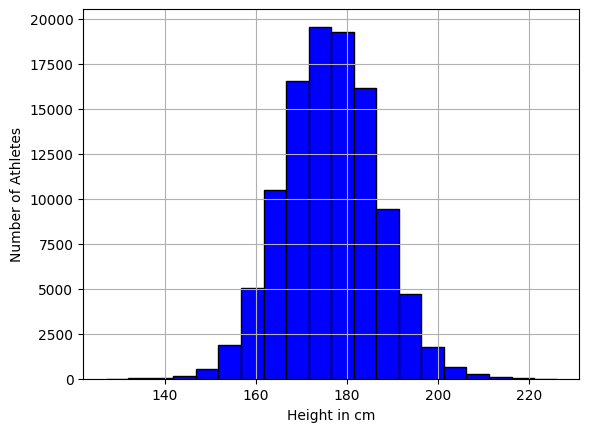

In [375]:
import matplotlib.pyplot as plt
plt.hist(data_excel['height_cm'] , bins=20 , color='blue', edgecolor='black')
plt.xlabel('Height in cm')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()

In [347]:
data = {
    'Date': ['2024-05-01', '2024-05-01', '2024-05-01', '2024-05-02', '2024-05-02', '2024-05-03', '2024-05-03', '2024-05-03'],
    'Item': ['Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange', 'Apple', 'Orange'],
    'Units Sold': [30, 21, 15, 40, 34, 20, 45, 25],
    'Price Per Unit': [1.0, 0.5, 0.75, 1.0, 0.5, 0.75, 1.0, 0.75],
    'Salesperson': ['John', 'John', 'John', 'Alice', 'Alice', 'John', 'Alice', 'John']
}

df = pd.DataFrame(data)

# Display the DataFrame
df

Date    Item  Units Sold  Price Per Unit Salesperson
0  2024-05-01   Apple          30            1.00        John
1  2024-05-01  Banana          21            0.50        John
2  2024-05-01  Orange          15            0.75        John
3  2024-05-02   Apple          40            1.00       Alice
4  2024-05-02  Banana          34            0.50       Alice
5  2024-05-03  Orange          20            0.75        John
6  2024-05-03   Apple          45            1.00       Alice
7  2024-05-03  Orange          25            0.75        John

In [359]:
pd.pivot_table(df, values='Units Sold', index='Date' , columns='Item' ,aggfunc='sum' )

Item        Apple  Banana  Orange
Date                             
2024-05-01   30.0    21.0    15.0
2024-05-02   40.0    34.0     NaN
2024-05-03   45.0     NaN    45.0